In [0]:
from keras.datasets import mnist

In [44]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(y_train.shape, y_test.shape)
print(y_train[0])
print(X_train[0])

(60000,) (10000,)
5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 25

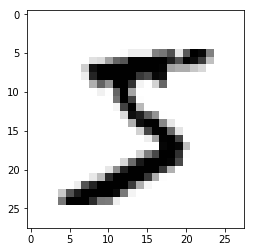

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap=plt.cm.binary)
plt.show()

In [46]:
print(X_train.shape)

(60000, 28, 28)


In [0]:
#We don't want to use sigmoid in our mnist example because our model would be mutually exclusive
#and sigmoid output classes are not mutually exclusive and the sigmoid function is used to 
#to choose many at the same time, which softmax doesn't do. You can only choose one with softmax

In [0]:
from keras import models
from keras import layers

network = models.Sequential()

In [0]:
network.add(layers.Dense(16, activation='tanh', input_shape=(28*28,)))

network.add(layers.Dense(10, activation='sigmoid'))

network.compile(optimizer='sgd', loss='categorical_crossentropy',\
                metrics=['accuracy'])

In [49]:
print(type(X_train))
print(X_train.shape)
print(X_train[0])
X_train = X_train.reshape((60000, 28*28))
X_train = X_train.astype('float32') / 255

X_test = X_test.reshape((10000, 28*28))
X_test = X_test.astype('float32') / 255
print(type(X_train))
print(X_train.shape)
print(X_train[0])

<class 'numpy.ndarray'>
(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   

In [50]:
print(y_train[:5])

from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train[:5])

[5 0 4 1 9]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [51]:
network.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 1s 20us/step - loss: 1.9736 - acc: 0.4994
Epoch 2/5
60000/60000 [==============================] - 1s 18us/step - loss: 1.6486 - acc: 0.7219
Epoch 3/5
60000/60000 [==============================] - 1s 18us/step - loss: 1.3910 - acc: 0.7959
Epoch 4/5
60000/60000 [==============================] - 1s 17us/step - loss: 1.1484 - acc: 0.8280
Epoch 5/5
60000/60000 [==============================] - 1s 17us/step - loss: 0.9589 - acc: 0.8441


In [52]:
test_loss, test_acc = network.evaluate(X_test, y_test)
print('test_acc:', test_acc)
print('test_loss:', test_loss)

10000/10000 [==============================] - 0s 25us/step
test_acc: 0.8569
test_loss: 0.8731808507919312


In [53]:
print(network.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________
None


In [54]:
network.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 1s 17us/step - loss: 0.8227 - acc: 0.8552
Epoch 2/5
60000/60000 [==============================] - 1s 17us/step - loss: 0.7254 - acc: 0.8635
Epoch 3/5
60000/60000 [==============================] - 1s 17us/step - loss: 0.6540 - acc: 0.8704
Epoch 4/5
60000/60000 [==============================] - 1s 17us/step - loss: 0.6001 - acc: 0.8752
Epoch 5/5
60000/60000 [==============================] - 1s 17us/step - loss: 0.5581 - acc: 0.8789


In [55]:
network.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 1s 17us/step - loss: 0.5246 - acc: 0.8830
Epoch 2/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.4971 - acc: 0.8870
Epoch 3/5
60000/60000 [==============================] - 1s 17us/step - loss: 0.4744 - acc: 0.8895
Epoch 4/5
60000/60000 [==============================] - 1s 17us/step - loss: 0.4550 - acc: 0.8921
Epoch 5/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.4383 - acc: 0.8943


In [56]:
network.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.4237 - acc: 0.8970
Epoch 2/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.4110 - acc: 0.8988
Epoch 3/5
60000/60000 [==============================] - 1s 17us/step - loss: 0.3996 - acc: 0.9009
Epoch 4/5
60000/60000 [==============================] - 1s 17us/step - loss: 0.3895 - acc: 0.9028
Epoch 5/5
60000/60000 [==============================] - 1s 18us/step - loss: 0.3803 - acc: 0.9047


In [0]:
#the accuracy barely got above .9000 showing that the alternatives were not as good as 'relu'

In [58]:
network.fit(X_train, y_train, epochs=25, batch_size=128)

Epoch 1/25
60000/60000 [==============================] - 1s 17us/step - loss: 0.3719 - acc: 0.9061
Epoch 2/25
60000/60000 [==============================] - 1s 17us/step - loss: 0.3643 - acc: 0.9074
Epoch 3/25
60000/60000 [==============================] - 1s 17us/step - loss: 0.3572 - acc: 0.9090
Epoch 4/25
60000/60000 [==============================] - 1s 17us/step - loss: 0.3508 - acc: 0.9102
Epoch 5/25
60000/60000 [==============================] - 1s 17us/step - loss: 0.3449 - acc: 0.9116
Epoch 6/25
60000/60000 [==============================] - 1s 17us/step - loss: 0.3393 - acc: 0.9123
Epoch 7/25
60000/60000 [==============================] - 1s 17us/step - loss: 0.3342 - acc: 0.9131
Epoch 8/25
60000/60000 [==============================] - 1s 18us/step - loss: 0.3293 - acc: 0.9140
Epoch 9/25
60000/60000 [==============================] - 1s 17us/step - loss: 0.3248 - acc: 0.9148
Epoch 10/25
60000/60000 [==============================] - 1s 18us/step - loss: 0.3205 - acc: 0.9158

In [59]:
test_loss, test_acc = network.evaluate(X_test, y_test)
print('test_acc:', test_acc)
print('test_loss:', test_loss)

10000/10000 [==============================] - 0s 21us/step
test_acc: 0.9259
test_loss: 0.2779850031018257


In [60]:
print(network.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
#the accuracy never reaches 1.0000. It shows that relu has a more accurate network than the alternatives